<a href="https://colab.research.google.com/github/Akkupawar/Car-Rental-System/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Minor Project : Image Classification using SVC

In [3]:
import pandas as pd
from skimage.io import imread
from skimage.transform import resize

In [4]:
import os
import numpy as np
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt


datafolder = '/content/drive/MyDrive/MinorProject/Images'
categories = ['Cats','Dogs']
target = []
images = []
flat_data = []

for category in categories:
    class_num = categories.index(category)
    path = os.path.join(datafolder, category)
    #dirs = os.listdir(path)
    print(path)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        gray = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY,)
        img_resize = resize(gray,(150,150,3))
        images.append(gray)
        flat_data.append(img_resize.flatten())
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


/content/drive/MyDrive/MinorProject/Images/Cats
/content/drive/MyDrive/MinorProject/Images/Dogs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


<BarContainer object of 2 artists>

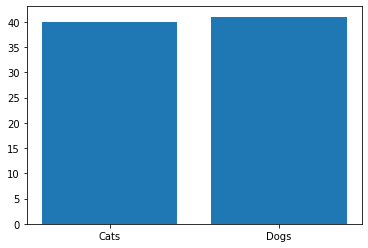

In [5]:
unique,count = np.unique(target, return_counts= True)
plt.bar(categories, count)


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
flat_data[0]

array([0.21713725, 0.21713725, 0.21713725, ..., 0.26666667, 0.26666667,
       0.26666667])

In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
# Creating Data Frame
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.217137,0.217137,0.217137,0.259294,0.259294,0.259294,0.311928,0.311928,0.311928,0.348699,0.348699,0.348699,0.392098,0.392098,0.392098,0.431033,0.431033,0.431033,0.450882,0.450882,0.450882,0.454745,0.454745,0.454745,0.435948,0.435948,0.435948,0.430399,0.430399,0.430399,0.450314,0.450314,0.450314,0.461353,0.461353,0.461353,0.478333,0.478333,0.478333,0.487863,...,0.269837,0.269837,0.269837,0.267150,0.267150,0.267150,0.277451,0.277451,0.277451,0.289869,0.289869,0.289869,0.286098,0.286098,0.286098,0.281373,0.281373,0.281373,0.274510,0.274510,0.274510,0.274510,0.274510,0.274510,0.274510,0.274510,0.274510,0.270588,0.270588,0.270588,0.263072,0.263072,0.263072,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0
1,0.555984,0.555984,0.555984,0.500255,0.500255,0.500255,0.474559,0.474559,0.474559,0.635222,0.635222,0.635222,0.858882,0.858882,0.858882,0.858225,0.858225,0.858225,0.870575,0.870575,0.870575,0.871765,0.871765,0.871765,0.867542,0.867542,0.867542,0.857539,0.857539,0.857539,0.868353,0.868353,0.868353,0.855114,0.855114,0.855114,0.833987,0.833987,0.833987,0.759882,...,0.461765,0.461765,0.461765,0.425516,0.425516,0.425516,0.440176,0.440176,0.440176,0.458824,0.458824,0.458824,0.454788,0.454788,0.454788,0.414510,0.414510,0.414510,0.359804,0.359804,0.359804,0.383716,0.383716,0.383716,0.405373,0.405373,0.405373,0.387827,0.387827,0.387827,0.293742,0.293742,0.293742,0.364431,0.364431,0.364431,0.560062,0.560062,0.560062,0
2,0.650980,0.650980,0.650980,0.651550,0.651550,0.651550,0.642615,0.642615,0.642615,0.344914,0.344914,0.344914,0.593144,0.593144,0.593144,0.651621,0.651621,0.651621,0.660876,0.660876,0.660876,0.666955,0.666955,0.666955,0.668784,0.668784,0.668784,0.668051,0.668051,0.668051,0.598687,0.598687,0.598687,0.358304,0.358304,0.358304,0.670275,0.670275,0.670275,0.671235,...,0.812772,0.812772,0.812772,0.809098,0.809098,0.809098,0.823791,0.823791,0.823791,0.758982,0.758982,0.758982,0.710052,0.710052,0.710052,0.714262,0.714262,0.714262,0.608481,0.608481,0.608481,0.275688,0.275688,0.275688,0.259813,0.259813,0.259813,0.350555,0.350555,0.350555,0.395464,0.395464,0.395464,0.438533,0.438533,0.438533,0.404167,0.404167,0.404167,0
3,0.040309,0.040309,0.040309,0.050444,0.050444,0.050444,0.084083,0.084083,0.084083,0.165826,0.165826,0.165826,0.289712,0.289712,0.289712,0.189076,0.189076,0.189076,0.074928,0.074928,0.074928,0.028954,0.028954,0.028954,0.026484,0.026484,0.026484,0.022248,0.022248,0.022248,0.043190,0.043190,0.043190,0.083804,0.083804,0.083804,0.103420,0.103420,0.103420,0.097098,...,0.465699,0.465699,0.465699,0.406715,0.406715,0.406715,0.421595,0.421595,0.421595,0.423054,0.423054,0.423054,0.453407,0.453407,0.453407,0.404431,0.404431,0.404431,0.425956,0.425956,0.425956,0.394558,0.394558,0.394558,0.380876,0.380876,0.380876,0.333826,0.333826,0.333826,0.262898,0.262898,0.262898,0.183320,0.183320,0.183320,0.173516,0.173516,0.173516,0
4,0.115882,0.115882,0.115882,0.098756,0.098756,0.098756,0.090753,0.090753,0.090753,0.096666,0.096666,0.096666,0.099758,0.099758,0.099758,0.094967,0.094967,0.094967,0.091851,0.091851,0.091851,0.093597,0.093597,0.093597,0.088388,0.088388,0.088388,0.093010,0.093010,0.093010,0.094751,0.094751,0.094751,0.073538,0.073538,0.073538,0.076980,0.076980,0.076980,0.079627,...,0.398535,0.398535,0.398535,0.388734,0.388734,0.388734,0.445003,0.445003,0.445003,0.488030,0.488030,0.488030,0.473957,0.473957,0.473957,0.545473,0.545473,0.545473,0.602398,0.602398,0.602398,0.503653,0.503653,0.503653,0.454653,0.454653,0.454653,0.379151,0.379151,0.379151,0.458408,0.458408,0.458408,0.584130,0.584130,0.584130,0.543588,0.543588,0.543588,0


In [10]:
# Splitting the data into Training and Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.2,random_state=109)

In [11]:
print(y_train.shape)
print(y_test.shape)

(64,)
(17,)


In [12]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([32, 32]))

In [13]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([8, 9]))

In [14]:
from sklearn.svm import SVC
model = SVC()

model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred = model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.4117647058823529

In [17]:
confusion_matrix(y_pred,y_test)

array([[3, 5],
       [5, 4]])

In [18]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.38      0.38      0.38         8
           1       0.44      0.44      0.44         9

    accuracy                           0.41        17
   macro avg       0.41      0.41      0.41        17
weighted avg       0.41      0.41      0.41        17



In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = param = [{
    'C':[1,10,100,1000],'kernel':['linear']}]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [21]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1])

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)


0.4117647058823529

In [23]:
confusion_matrix(y_pred,y_test)

array([[3, 5],
       [5, 4]])

In [31]:
import joblib
joblib.dump(clf,open('img_class.p','wb'))

In [25]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 7.0MB 5.6MB/s 
     |████████████████████████████████| 4.6MB 33.3MB/s 
     |████████████████████████████████| 112kB 43.8MB/s 
     |████████████████████████████████| 163kB 35.6MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 122kB 51.3MB/s 
     |████████████████████████████████| 71kB 5.6MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.


In [30]:
%%writefile app.py
import pickle
import joblib
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
st.title('Clasification Of Image')
st.text('Upload Image Here : ')

model = joblib.load(open('img_class.p','rb'))

Uploaded_file = st.file_uploader("Choose an image :",type = "jpg")
if Uploaded_file is not None:
  img = Image.open(Uploaded_file)
  st.image(img,caption='Uploaded Image')

if st.button('PREDICT'):
  categories = ['Cats','Dogs']
  st.write('Result :')
  flat_data=[]
  img = np.array(img)
  img_resize = resize(img,(150,150,3))
  flat_data.append(img_resize.flatten())
  flat_data = np.array(flat_data)
  y_out = model.predict(flat_data)
  y_out = categories[y_out[0]]
  st.title(f'PREDICTED OUTPUT : {y_out}')

Overwriting app.py


In [27]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'
http://58be4ea4f6f0.ngrok.io
